# load Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import re



In [5]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings("ignore")


# 1. Data Exploration

In [6]:
dataset = pd.read_excel('Processed_Flipdata.xlsx')

np.random.seed(1) # to get the same random result every time
dataset.sample(n=10)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
499,583,Infinix Note 12 Pro,Tuscany Blue,256,8,5000,108MP,16MP,1,17.02,Mediatek Helio G99,16999
486,566,SAMSUNG Galaxy A23,Peach,128,6,5000,50MP,8MP,0,16.76,Octa-core(EXYNOS),17499
65,65,SAMSUNG Galaxy F14 5G,GOAT Green,128,6,6000,50MP,13MP,0,16.76,"Exynos 1330, Octa Core",14490
41,41,REDMI 10,Caribbean Green,128,6,6000,50MP,5MP,0,17.02,Qualcomm Snapdragon 680,10999
326,331,POCO F5 5G,Snowstorm White,256,6,5000,64MP,16MP,0,16.94,Qualcomm Snapdragon 7+ Gen 2 (4nm),32999
403,431,SAMSUNG Galaxy A34 5G,Awesome Graphite,128,8,5000,48MP,13MP,0,16.76,"Dimensity 1080, Octa Core",30999
514,606,MOTOROLA g31,Meteorite Grey,64,4,5000,50MP,13MP,0,16.26,Mediatek Helio G85,11999
250,250,micromax,Lake Blue,64,4,1500,0MP,0MP,0,6.10,Mediatek MT6261D,1199
47,47,MOTOROLA g13,Lavender Blue,128,4,5000,50MP,8MP,0,16.51,Helio G85,9999
172,172,Infinix Smart 6 HD,Force Black,32,2,5000,8MP,5MP,0,16.76,Mediatek Helio A22,5999


In [7]:
# dropping the columns

dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
# converting dtype of price column(object to integer type):
dataset['Prize'] =dataset['Prize'].replace(',','').astype('int64')

In [10]:
dataset.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [11]:
# defining a function to extract the numeric value from front camera and rear camera and converting it integer dtype:

def extract_numeric(value):
    numeric_part = re.search(r'\d+', value).group()
    return int(numeric_part)

In [12]:
dataset['Rear Camera'] = dataset['Rear Camera'].apply(extract_numeric)
dataset['Front Camera'] = dataset['Front Camera'].apply(extract_numeric)
dataset

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
5,Infinix HOT 30i,Glacier Blue,128,8,5000,50,5,1,16.76,G37,8999
6,Infinix HOT 30i,Mirror Black,128,8,5000,50,5,1,16.76,G37,8999
7,Infinix HOT 30i,Diamond White,128,8,5000,50,5,1,16.76,G37,8999
8,Infinix HOT 30i,Diamond White,64,4,5000,50,5,1,16.76,G37,7999
9,Infinix HOT 30i,Mirror Black,64,4,5000,50,5,1,16.76,G37,7999


In [13]:
df = dataset.rename(columns={'Battery_':'Battery','Rear Camera':'Rear_camera_mp','Front Camera':'Front_Camera_mp','Processor_':'Processor','Prize':'Price'})
df

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor,Price
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
5,Infinix HOT 30i,Glacier Blue,128,8,5000,50,5,1,16.76,G37,8999
6,Infinix HOT 30i,Mirror Black,128,8,5000,50,5,1,16.76,G37,8999
7,Infinix HOT 30i,Diamond White,128,8,5000,50,5,1,16.76,G37,8999
8,Infinix HOT 30i,Diamond White,64,4,5000,50,5,1,16.76,G37,7999
9,Infinix HOT 30i,Mirror Black,64,4,5000,50,5,1,16.76,G37,7999


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            541 non-null    object 
 1   Colour           541 non-null    object 
 2   Memory           541 non-null    int64  
 3   RAM              541 non-null    int64  
 4   Battery          541 non-null    int64  
 5   Rear_camera_mp   541 non-null    int64  
 6   Front_Camera_mp  541 non-null    int64  
 7   AI Lens          541 non-null    int64  
 8   Mobile Height    541 non-null    float64
 9   Processor        541 non-null    object 
 10  Price            541 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 46.6+ KB


In [15]:
df.shape # there  are 541 rows and 11 columns in our data set

(541, 11)

In [16]:
# calculating the missing values:
def calculate_missing_values(data):
    missing_values = data.isnull().sum()
    return missing_values
    


missing_data = calculate_missing_values(df)
print(missing_data)

Model              0
Colour             0
Memory             0
RAM                0
Battery            0
Rear_camera_mp     0
Front_Camera_mp    0
AI Lens            0
Mobile Height      0
Processor          0
Price              0
dtype: int64


**Finding- there are no missing values in the data set**

In [17]:
def unistats(df):
    import pandas as pd
    output_df = pd.DataFrame(columns = ['Count','Missing','Unique','Dtype','Numeric','Mode','Mean','Min','25%','Median','75%','Max','Std','skew','Kurt'])
    
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtypes,
                                  pd.api.types.is_numeric_dtype(df[col]),df[col].mode().values[0],df[col].mean(),df[col].min(),
                                  df[col].quantile(0.25),df[col].median(),df[col].quantile(0.75),df[col].max(),df[col].std(),
                                  df[col].skew(),df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtypes,
                                  pd.api.types.is_numeric_dtype(df[col]),df[col].mode().values[0],'-','-',
                                  '-','-','-','-','-','-','-']
    return output_df

unistats(df)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,skew,Kurt
Model,541,0,187,object,False,REDMI Note 12 Pro 5G,-,-,-,-,-,-,-,-,-
Colour,541,0,275,object,False,Yellow,-,-,-,-,-,-,-,-,-
Memory,541,0,5,int64,True,128,110.550832,16,64.0,128.0,128.0,256,60.600694,1.029704,0.855888
RAM,541,0,5,int64,True,4,5.397412,2,4.0,6.0,8.0,8,1.984923,0.067617,-1.306301
Battery,541,0,37,int64,True,5000,4871.5878,800,5000.0,5000.0,5000.0,7000,780.148862,-3.30425,14.752188
Rear_camera_mp,541,0,14,int64,True,50,46.110906,0,13.0,50.0,50.0,200,31.260416,1.799491,7.227342
Front_Camera_mp,541,0,13,int64,True,16,11.992606,0,5.0,8.0,16.0,60,9.053746,2.492864,8.756549
AI Lens,541,0,2,int64,True,0,0.062847,0,0.0,0.0,0.0,1,0.242911,3.612638,11.092146
Mobile Height,541,0,38,float64,True,16.76,16.431201,4.5,16.51,16.71,16.94,41.94,2.523553,1.171778,48.220112
Processor,541,0,123,object,False,Qualcomm Snapdragon 680,-,-,-,-,-,-,-,-,-


**Finding - For the front camera megapixel column we find that mean is 11.9926 and max is 60, skewness is 2.492 which is gerater than 2 which is generaly not acceptable so we must calculate the outliers and if available we must remove it, we must check for the outliers for all the  numeric variables**

In [18]:
df.describe(include = 'object')

# here we can clearly see there are 187 unique set of model majority is is vivo Y16 having frequency of 9
# similarly in processor- majority is of  "Qualcomm Snapdragon 680" processor with frequency of 33

,Model,Colour,Processor
count,541,541,541
unique,187,275,123
top,vivo Y16,Yellow,Qualcomm Snapdragon 680
freq,9,12,33


# Numerical feature in the data set:

In [19]:
## 1.  Discrete Variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 5


In [20]:
numerical_features

['Memory',
 'RAM',
 'Battery',
 'Rear_camera_mp',
 'Front_Camera_mp',
 'AI Lens',
 'Mobile Height',
 'Price']

In [21]:
discrete_feature

['Memory', 'RAM', 'Rear_camera_mp', 'Front_Camera_mp', 'AI Lens']

In [22]:
#2.Continous variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [23]:
continuous_feature

['Battery', 'Mobile Height', 'Price']

# analyzing continuous variables by creating histograms to understand the distribution

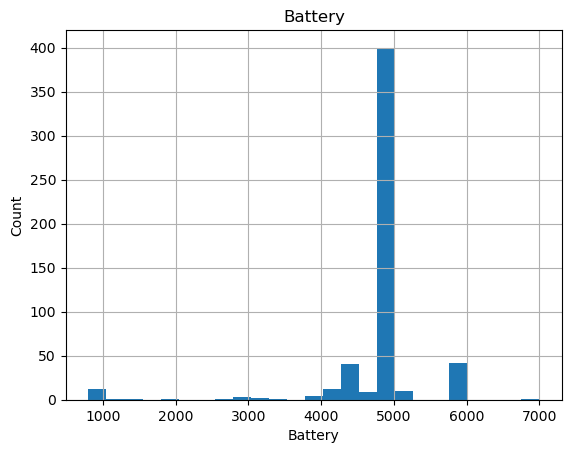

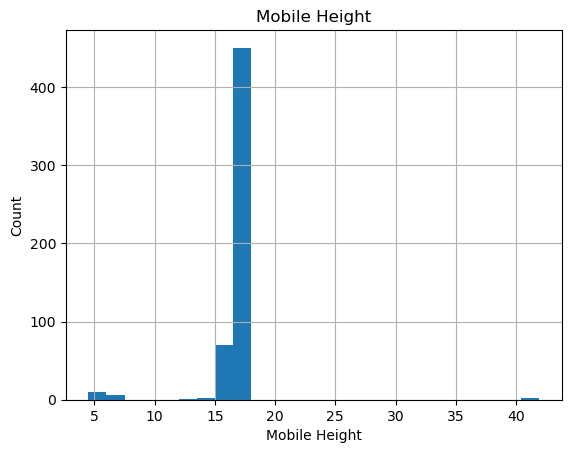

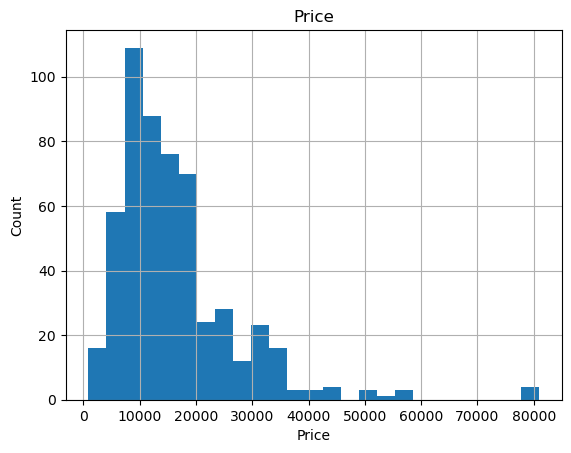

In [24]:

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

 >prices is right-skewed, it means that the majority of mobile prices are concentrated towards the lower end of the price range, with a few high-priced outliers pulling the mean or median price upwards. 

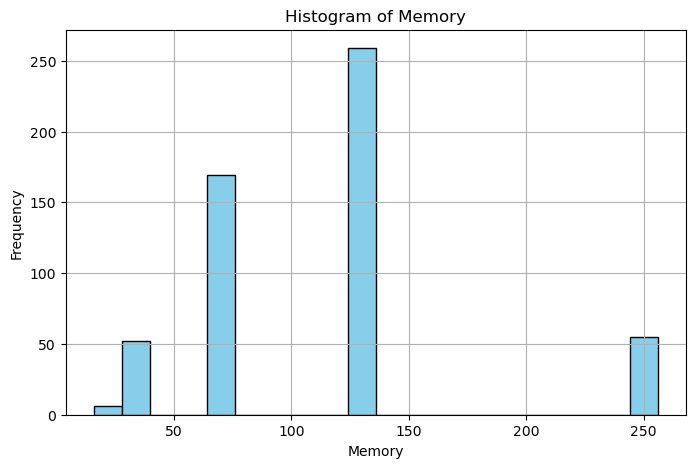

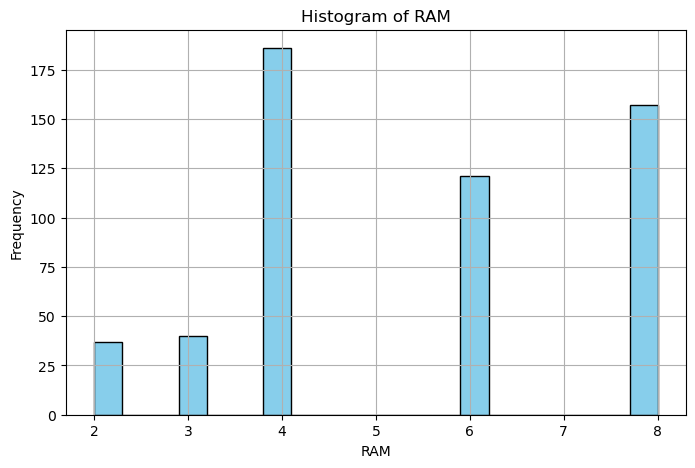

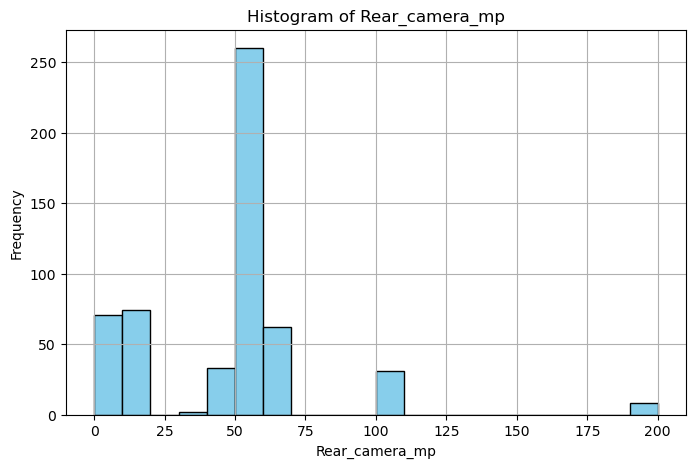

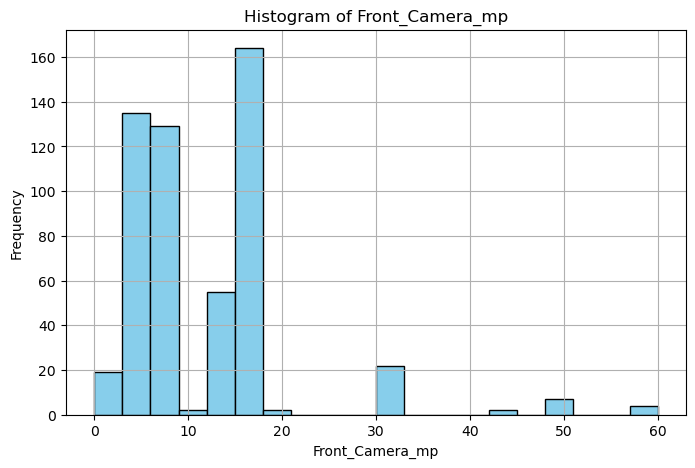

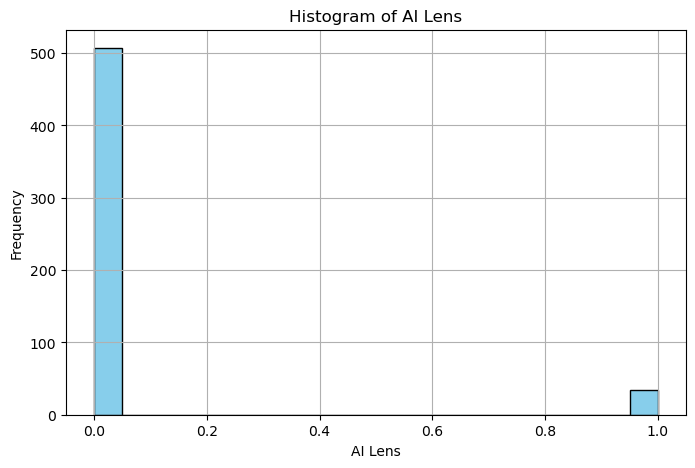

In [25]:
for col in discrete_feature:
        plt.figure(figsize=(8, 5))
        plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

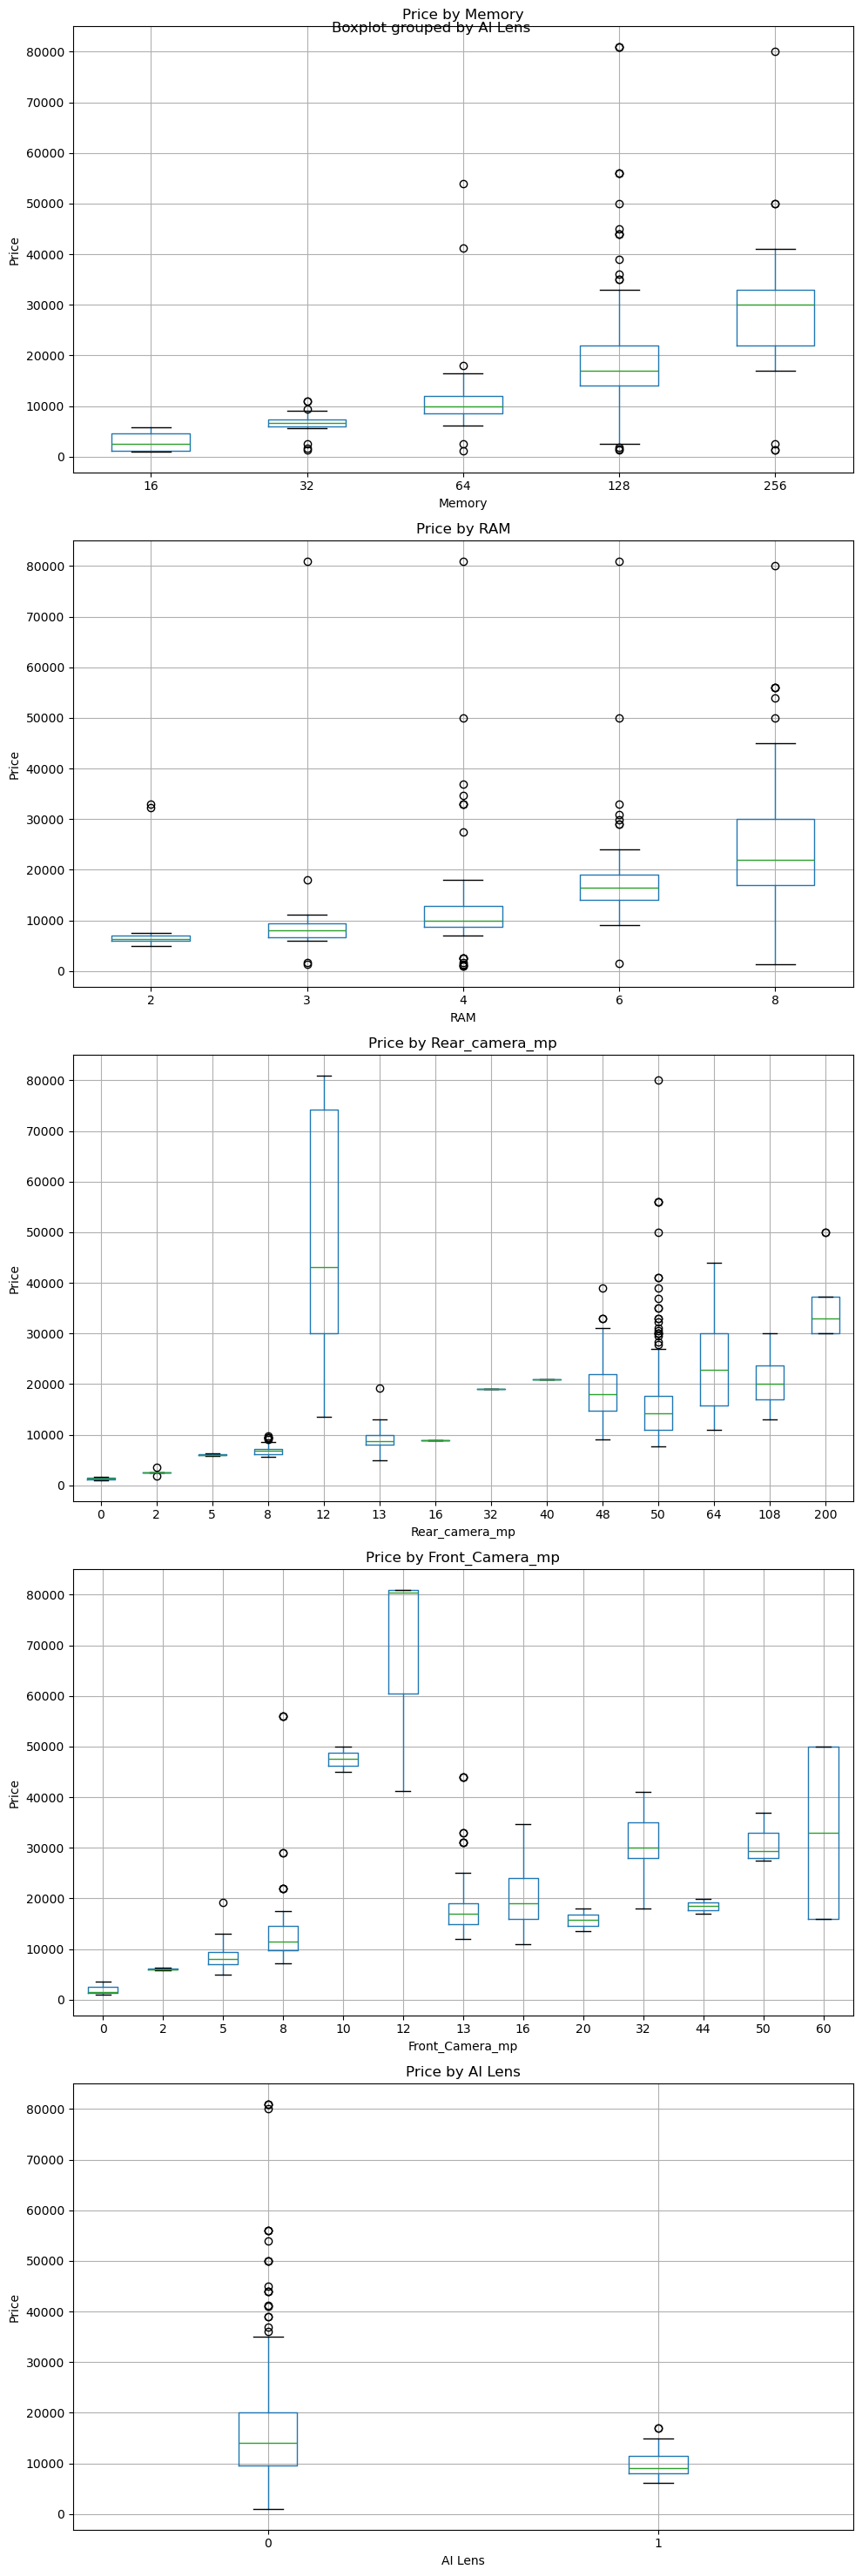

In [26]:
fig, axes = plt.subplots(nrows=len(discrete_feature), ncols=1, figsize=(10, 6*len(discrete_feature)))

for i, feature in enumerate(discrete_feature):
    ax = axes[i]
    df.boxplot(column='Price', by=feature, ax=ax)
    ax.set_title(f'Price by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')
    ax.grid(True)

plt.tight_layout()
plt.show()

>Here we found that there is a positive correlation between sales price and discreate feature there are outliers present in the discreate featuret 

# Outliers:

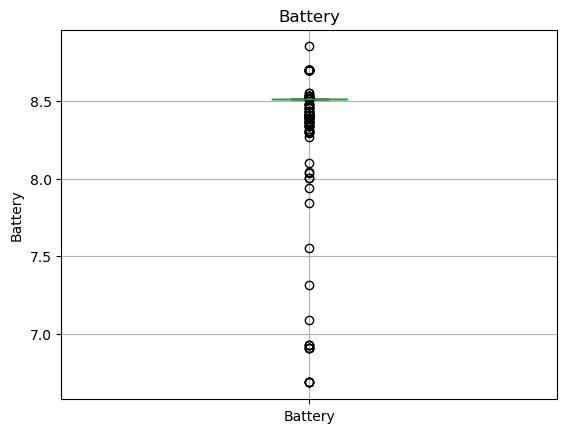

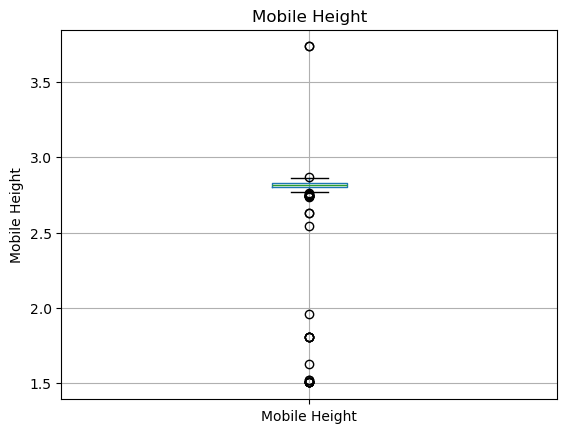

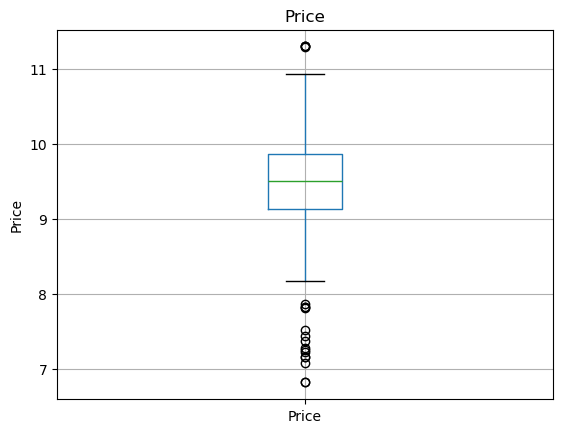

In [27]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

> Here we found that there are outliers in the data set and we need to deal with the outliers**

# Finfing out the categotical varaiable in the data set

In [28]:
def get_categorical_features(data):
    categorical_columns = data.select_dtypes(include=['object', 'category'])
    return categorical_columns

categorical_features = get_categorical_features(df)
categorical_features.head()


,Model,Colour,Processor
0,Infinix SMART 7,Night Black,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,G37


In [29]:
# unique value for categorical variables:

for column in df.columns:
    if df[column].dtype =="object":
        print(column.upper(), ": ",df[column].nunique())
        print(df[column].value_counts())
        print("\n")
        print("*"*65)
        print("\n")

MODEL :  187
Model
vivo Y16                              9
realme C55                            9
SAMSUNG Galaxy A14 5G                 9
REDMI Note 12 Pro 5G                  9
vivo T1 44W                           8
Infinix HOT 30i                       8
REDMI 10                              8
SAMSUNG Galaxy F14 5G                 8
vivo T2x 5G                           8
realme C33 2023                       6
realme 9i 5G                          6
REDMI Note 12                         6
REDMI K50i 5G                         6
REDMI Note 12 5G                      6
REDMI 11 Prime                        6
realme 10 Pro 5G                      6
POCO M5                               6
POCO X5 Pro 5G                        6
REDMI Note 12 Pro+ 5G                 6
SAMSUNG Galaxy F23 5G                 6
POCO F5 5G                            6
REDMI A1+                             6
realme 10 Pro+ 5G                     6
SAMSUNG Galaxy F13                    6
POCO X4 Pro 5G       

In [30]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Model and number of categories are 187
The feature is Colour and number of categories are 275
The feature is Processor and number of categories are 123


# Find out the relationship between continuous variable and dependent feature SalesPrice

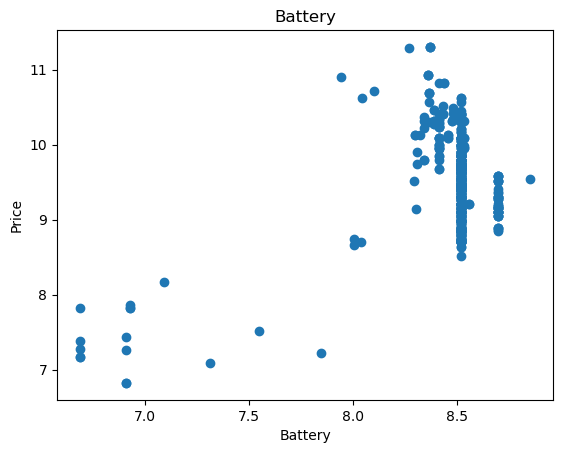

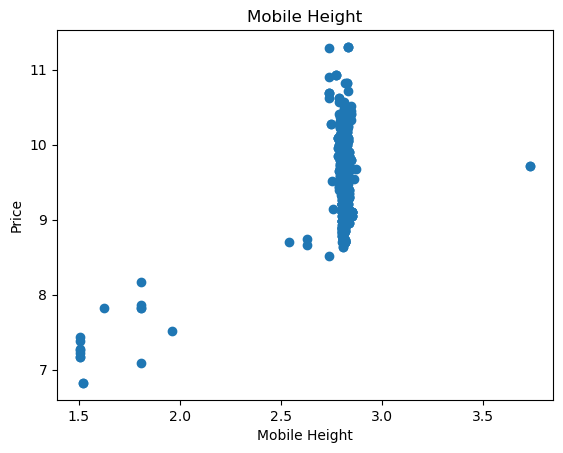

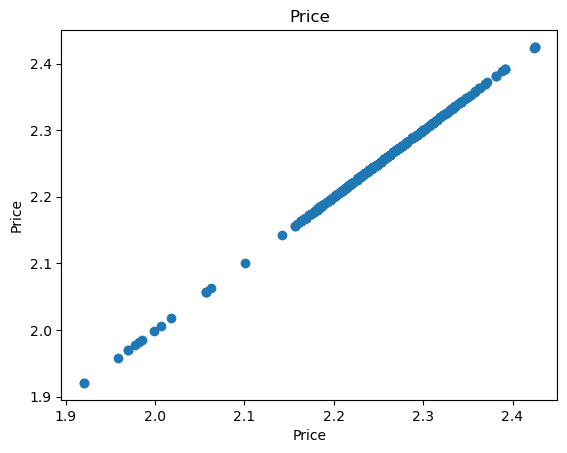

In [31]:

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

>Here we found that there are positive correlation between the continuous varaible and sale sprice but there are outlires which are affecting the price so we need to treat the outliers correctly

# 2. Data Preprocessing

**Converting Categorical values into numerical format: using ordinal encoding**

In [32]:
from sklearn.preprocessing import OrdinalEncoder
encoded_column = ['Model','Colour','Processor']
encoder = OrdinalEncoder()
df[encoded_column] = encoder.fit_transform(df[encoded_column])
df.head()

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor,Price
0,23.0,159.0,64,4,6000,13,5,1,16.76,113.0,7299
1,23.0,20.0,64,4,6000,13,5,1,16.76,113.0,7299
2,37.0,149.0,128,8,5000,50,16,0,16.64,75.0,11999
3,69.0,201.0,32,2,5000,8,5,0,16.56,56.0,5649
4,12.0,130.0,128,8,5000,50,5,1,16.76,14.0,8999


In [33]:
df['RAM'].unique()

array([4, 8, 2, 6, 3], dtype=int64)

In [34]:
#converting Memory,ram,Battery,and Ai lense to object 

df['RAM'] = df['RAM'].astype('object')
df['Battery'] = df['Battery'].astype('object')
df['AI Lens'] = df['AI Lens'].astype('object')


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            541 non-null    float64
 1   Colour           541 non-null    float64
 2   Memory           541 non-null    int64  
 3   RAM              541 non-null    object 
 4   Battery          541 non-null    object 
 5   Rear_camera_mp   541 non-null    int64  
 6   Front_Camera_mp  541 non-null    int64  
 7   AI Lens          541 non-null    object 
 8   Mobile Height    541 non-null    float64
 9   Processor        541 non-null    float64
 10  Price            541 non-null    int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 46.6+ KB


# replacing outliers with the IQR

In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Model                89.0
Colour              133.0
Memory               64.0
RAM                   4.0
Battery               0.0
Rear_camera_mp       37.0
Front_Camera_mp      11.0
AI Lens               0.0
Mobile Height        0.43
Processor            43.0
Price              9990.0
dtype: object


In [37]:
# getting column with the outliers:
(((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))==True).any()

Model              False
Colour             False
Memory              True
RAM                False
Battery             True
Rear_camera_mp      True
Front_Camera_mp     True
AI Lens             True
Mobile Height       True
Processor          False
Price               True
dtype: bool

In [38]:

def replace_outliers_with_iqr(data, threshold=1.5):
   
    numerical_columns = data.select_dtypes(include=['number']).columns
    
    for col in numerical_columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        data[col] = data[col].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else data[col].median())
    
    return data



df = replace_outliers_with_iqr(df)


In [39]:
(((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))==True).any()

Model              False
Colour             False
Memory             False
RAM                False
Battery             True
Rear_camera_mp     False
Front_Camera_mp    False
AI Lens             True
Mobile Height      False
Processor          False
Price              False
dtype: bool

In [40]:
df.shape

(541, 11)

In [41]:
df_clean = df.copy()

In [42]:
df_clean.to_csv('MasterNew.csv')

> Here outliers are removed from the data set

# Feature extraction

In [43]:
#Feature affeting the price:

df_clean.corr(numeric_only = True)['Price'].sort_values(ascending = False)

Price              1.000000
Front_Camera_mp    0.668308
Memory             0.656482
Rear_camera_mp     0.587813
Model              0.124920
Mobile Height      0.109338
Colour             0.058503
Processor         -0.094905
Name: Price, dtype: float64

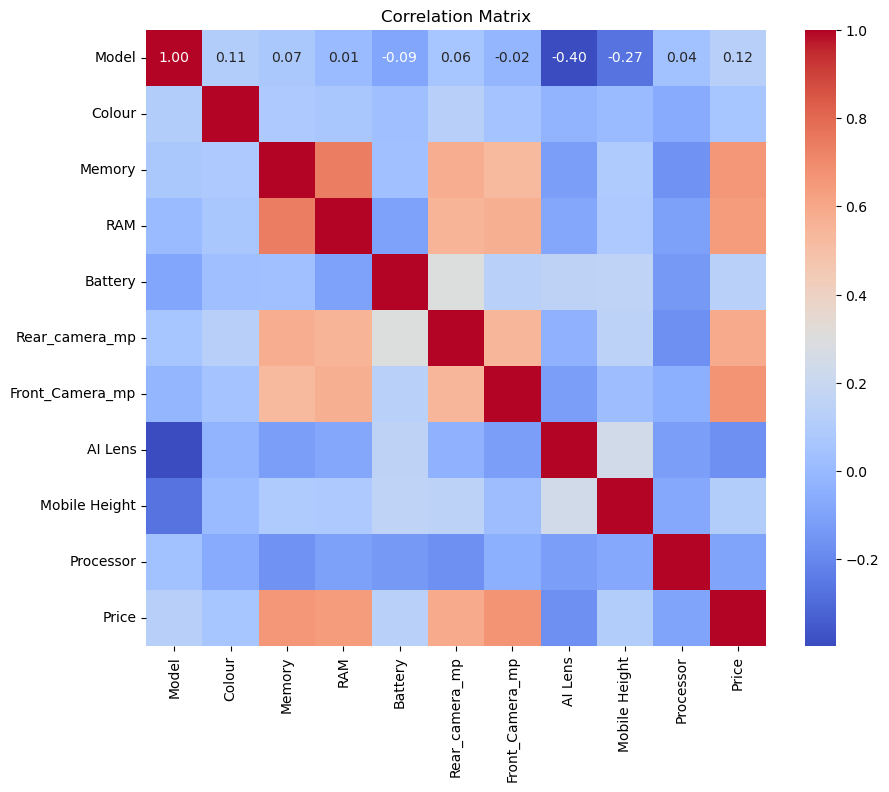

In [44]:
# Calculate correlation matrix
corr_matrix = df_clean.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

>Here we found that Storage capacity  is the most important feature affecting the price of mobile phone followed by Rear camera megapixel

<Axes: xlabel='Memory', ylabel='Price'>

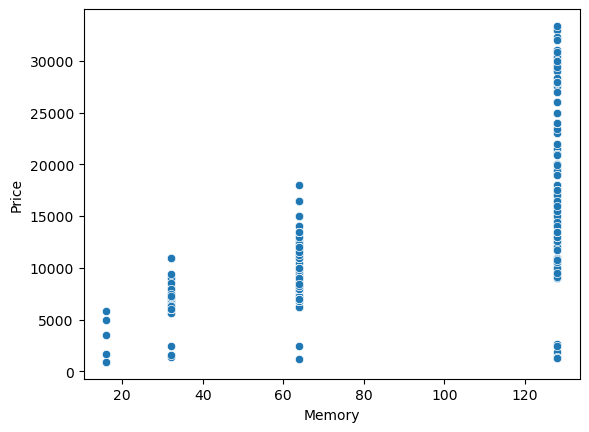

In [45]:
sns.scatterplot(data =df_clean, x='Memory', y='Price')

>**Finding- Here we can see as memory storage increases price of the product also increases**

# 4. Model Building

In [46]:
df_clean

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor,Price
0,23.0,159.0,64.0,4,6000,13.0,5.0,1,16.76,113.0,7299.0
1,23.0,20.0,64.0,4,6000,13.0,5.0,1,16.76,113.0,7299.0
2,37.0,149.0,128.0,8,5000,50.0,16.0,0,16.64,75.0,11999.0
3,69.0,201.0,32.0,2,5000,8.0,5.0,0,16.56,56.0,5649.0
4,12.0,130.0,128.0,8,5000,50.0,5.0,1,16.76,14.0,8999.0
5,12.0,88.0,128.0,8,5000,50.0,5.0,1,16.76,14.0,8999.0
6,12.0,151.0,128.0,8,5000,50.0,5.0,1,16.76,14.0,8999.0
7,12.0,65.0,128.0,8,5000,50.0,5.0,1,16.76,14.0,8999.0
8,12.0,65.0,64.0,4,5000,50.0,5.0,1,16.76,14.0,7999.0
9,12.0,151.0,64.0,4,5000,50.0,5.0,1,16.76,14.0,7999.0


In [47]:
X = df_clean.drop('Price',axis=1)
y = df_clean['Price']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [49]:
X_train.head()

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor
329,3.0,274.0,128.0,8,4500,50.0,16.0,0,16.64,87.0
16,12.0,130.0,64.0,4,5000,50.0,5.0,1,16.76,14.0
85,153.0,252.0,64.0,4,5000,64.0,8.0,0,17.07,21.0
518,91.0,182.0,128.0,8,5080,64.0,16.0,0,16.76,8.0
407,9.0,195.0,64.0,4,6000,13.0,8.0,0,17.32,115.0


In [50]:
y_train.head()

329    30999.0
16      7999.0
85     10999.0
518    29990.0
407     8999.0
Name: Price, dtype: float64

# Standard scaler

In [51]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [52]:
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [53]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = X_test.columns)

In [54]:
x_train_scaled.head()

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor
0,-1.770429,1.716825,0.791701,1.304180,-0.536182,0.459218,0.805454,-0.263262,-0.355331,0.785821
1,-1.600509,-0.111414,-0.957735,-0.715195,0.152789,0.459218,-0.973959,3.798496,0.144272,-1.465828
2,1.061558,1.437511,-0.957735,-0.715195,0.152789,1.189523,-0.488664,-0.263262,1.434913,-1.249916
3,-0.108997,0.548783,0.791701,1.304180,0.263024,1.189523,0.805454,-0.263262,0.144272,-1.650895
4,-1.657149,0.713833,-0.957735,-0.715195,1.530729,-1.470875,-0.488664,-0.263262,2.475753,1.649467


In [55]:
np.round(x_train_scaled.describe())

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor
count,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0
mean,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-2.0,-2.0,-2.0,-6.0,-2.0,-2.0,-0.0,-3.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-0.0,-1.0,-1.0
50%,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
75%,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-0.0,1.0,1.0
max,2.0,2.0,1.0,1.0,3.0,1.0,3.0,4.0,3.0,2.0


# Linear Regression

In [56]:
linearmodel = LinearRegression()

In [57]:
linearmodel.fit(X_train,y_train)

LinearRegression()

In [58]:
linearmodel.score(X_test,y_test)

0.6280204977724704

In [59]:
linearmodel.coef_

array([ 1.60489763e+01, -1.44167644e+00,  4.53500617e+01,  6.08395301e+02,
        5.59626904e-01,  4.37599221e+01,  4.36371816e+02, -1.22328475e+03,
        1.44018452e+03,  1.20838443e+00])

# Predict the model

In [60]:
y_pred = linearmodel.predict(X_test)

In [61]:
y_pred

array([18109.14404496, 15758.54549668, 18655.01482687, 15209.08947388,
       19527.26038289, 19254.12981852, 12159.29665023,  4352.69750472,
       13196.70461909,  4647.28434088,  6979.18013524, 20036.45283174,
       15971.91360925, 20223.87076845, 26937.12956537, 10887.58069497,
        5068.0330025 ,  7757.44132213, 20987.90116943,  2550.14307404,
        5735.06736868, 19260.78167432,  6880.43070219,  7552.11205038,
        9442.83586915, 21110.3869857 , 18036.17775038, 17530.49151714,
       17593.73584143,  7512.05265693, 25881.43187115, 11767.72159533,
       15342.68585726,  6077.88959376, 19782.65040096, 10966.73273339,
       11515.48870216,  7101.65209209, 10280.83272411, 20202.83587272,
       10691.56306961, 26932.80453606, 12161.20105154, 20843.14882366,
       19939.50975753,  9253.976256  ,  7172.41909397, 14012.73878263,
       18514.94859736, 18351.51873952,  9325.72533865,  8195.59926014,
       19989.15027079,  2469.5212957 ,  7266.12806233, 10129.45669831,
      

In [62]:
# Errors:
test_residuals = y_test - y_pred

In [63]:

def create_dataframe(column1, column2,column3,col_name1='Column 1', col_name2='Column 2',col_name3='Column 3'):
    
    if len(column1) != len(column2):
        raise ValueError("Both columns must have the same length.")
    
    data = {col_name1: column1, col_name2: column2,col_name3:column3}
    df = pd.DataFrame(data)
    return df


Predicted_price = y_pred
actual_price= y_test

comparison = create_dataframe(Predicted_price, actual_price,test_residuals,'Predicted price','Actual price','Error')
print(comparison)

     Predicted price  Actual price         Error
499     18109.144045       16999.0  -1110.144045
486     15758.545497       17499.0   1740.454503
65      18655.014827       14490.0  -4165.014827
41      15209.089474       10999.0  -4210.089474
326     19527.260383       32999.0  13471.739617
403     19254.129819       30999.0  11744.870181
514     12159.296650       11999.0   -160.296650
250      4352.697505        1199.0  -3153.697505
47      13196.704619        9999.0  -3197.704619
172      4647.284341        5999.0   1351.715659
383      6979.180135        9499.0   2519.819865
261     20036.452832       21999.0   1962.547168
528     15971.913609       17499.0   1527.086391
260     20223.870768       21999.0   1775.129232
465     26937.129565       13499.0 -13438.129565
119     10887.580695       11999.0   1111.419305
244      5068.033002        3549.0  -1519.033002
479      7757.441322        8999.0   1241.558678
107     20987.901169       15999.0  -4988.901169
247      2550.143074

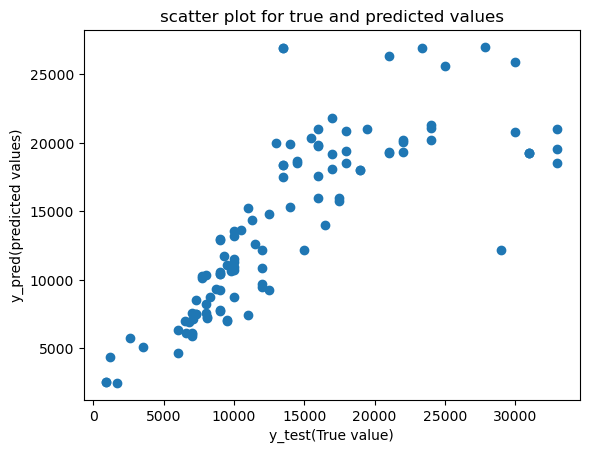

In [64]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test(True value)')
plt.ylabel('y_pred(predicted values)')
plt.title('scatter plot for true and predicted values')
plt.show()

# Model Evaluation

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [66]:
df['Price'].mean()

14540.186691312385

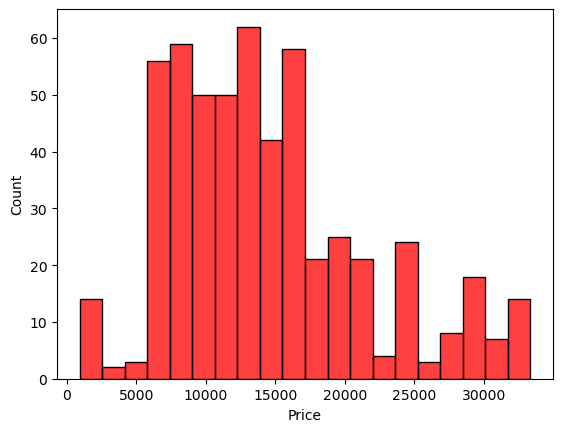

In [67]:
sns.histplot(data=df,x='Price',bins = 20,color = 'red')
plt.show()

**From the above graph we found that maximum number of mobile cost between 8000 to 12000**

In [68]:
mean_absolute_error(y_test,y_pred)

3090.4349230572584

In [69]:
mean_squared_error(y_test,y_pred)

21489943.52461032

In [70]:
metrics.explained_variance_score(y_test,y_pred)

0.6281145474427088

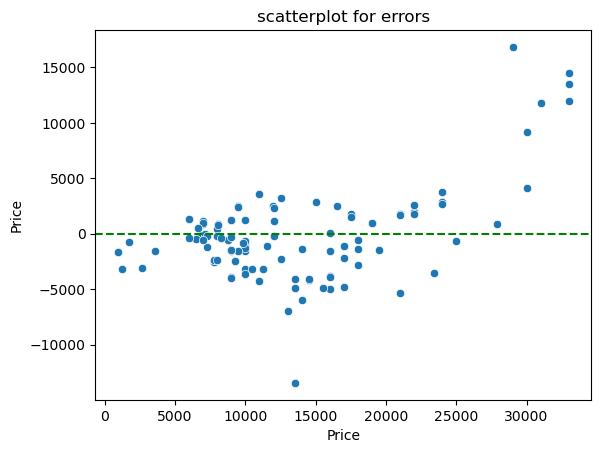

In [71]:
sns.scatterplot(x = y_test,y =test_residuals)
plt.axhline(y=0,color = 'g',ls = '--')
plt.title('scatterplot for errors')
plt.show()

# No clear line or curve we should not prefer the linear regression

# Feature Important analysis

In [72]:
X.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery', 'Rear_camera_mp',
       'Front_Camera_mp', 'AI Lens', 'Mobile Height', 'Processor'],
      dtype='object')

In [73]:
coeff_analysis =pd.DataFrame(linearmodel.coef_,X.columns,columns = ['coeff'])

In [74]:
coeff_analysis.sort_values('coeff',ascending = False)

,coeff
Mobile Height,1440.184522
RAM,608.395301
Front_Camera_mp,436.371816
Memory,45.350062
Rear_camera_mp,43.759922
Model,16.048976
Processor,1.208384
Battery,0.559627
Colour,-1.441676
AI Lens,-1223.284753


**Ram is the most relevant feature affect the price of mobile followed by Front mega pixel camera followed by mobile height**

# Decision tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
dtmodel.score(X_test,y_test)

0.6238532110091743

In [77]:
base_pred = dtmodel.predict(X_test)
base_pred

array([16999., 16499., 14490., 10999., 32999., 32999., 11980.,  2490.,
        9999.,  5999.,  9499., 18999., 17499., 18990., 13499., 11999.,
        2499.,  8999., 13499.,  6499., 19280., 20999.,  7280.,  7999.,
       12499., 23999., 18999., 13490., 15999.,  6799., 29999.,  9290.,
       13999.,  6999., 15999.,  9999.,  9999.,  7245.,  7749., 21999.,
        9999., 13499., 28999., 17999., 13999., 12499., 11209., 16499.,
       32999., 32999.,  7961.,  7999., 12999.,  2499., 11209.,  7749.,
       13999., 11999.,  8999., 12499., 10499., 15999., 29999., 14490.,
        9499., 10999., 18990., 17999., 29499.,  9999.,  6499., 28298.,
       20999.,  8999., 12272.,  5990.,  9349.,  6799.,  7961., 16499.,
       13499.,  9999.,  6999., 29999., 32999.,  7299., 14999., 24999.,
        8999., 16999., 15999., 23999., 19499.,  6999.,  8999.,  8999.,
        9499., 16999.,  6999.,  6799.,  8999.,  7999., 32999., 12499.,
       18999.,  6499., 10989., 21999.,  6599.])

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [79]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1699.0       0.00      0.00      0.00         1
      2490.0       0.00      0.00      0.00         0
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5999.0       1.00      0.50      0.67         2
      6499.0       0.33      1.00      0.50         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7280.0       0.00      0.00      0.00         0
      7299.0       1.00    

In [80]:
print(confusion_matrix(y_test,base_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 1 0 2]]


In [81]:
dtmodel.feature_importances_

array([0.21582698, 0.10211951, 0.02727728, 0.14342032, 0.06615772,
       0.05304915, 0.05418523, 0.01612482, 0.14147812, 0.18036088])

In [82]:
X.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery', 'Rear_camera_mp',
       'Front_Camera_mp', 'AI Lens', 'Mobile Height', 'Processor'],
      dtype='object')

In [83]:
pd.DataFrame(index = X.columns,data = dtmodel.feature_importances_,
            columns = ['Feature Importance']).sort_values('Feature Importance',ascending = False)

,Feature Importance
Model,0.215827
Processor,0.180361
RAM,0.143420
Mobile Height,0.141478
Colour,0.102120
Battery,0.066158
Front_Camera_mp,0.054185
Rear_camera_mp,0.053049
Memory,0.027277
AI Lens,0.016125


**according to decison tree model is the feature which affect the price most** 

Text(0.5, 1.0, 'correlation analysis of most relevant features')

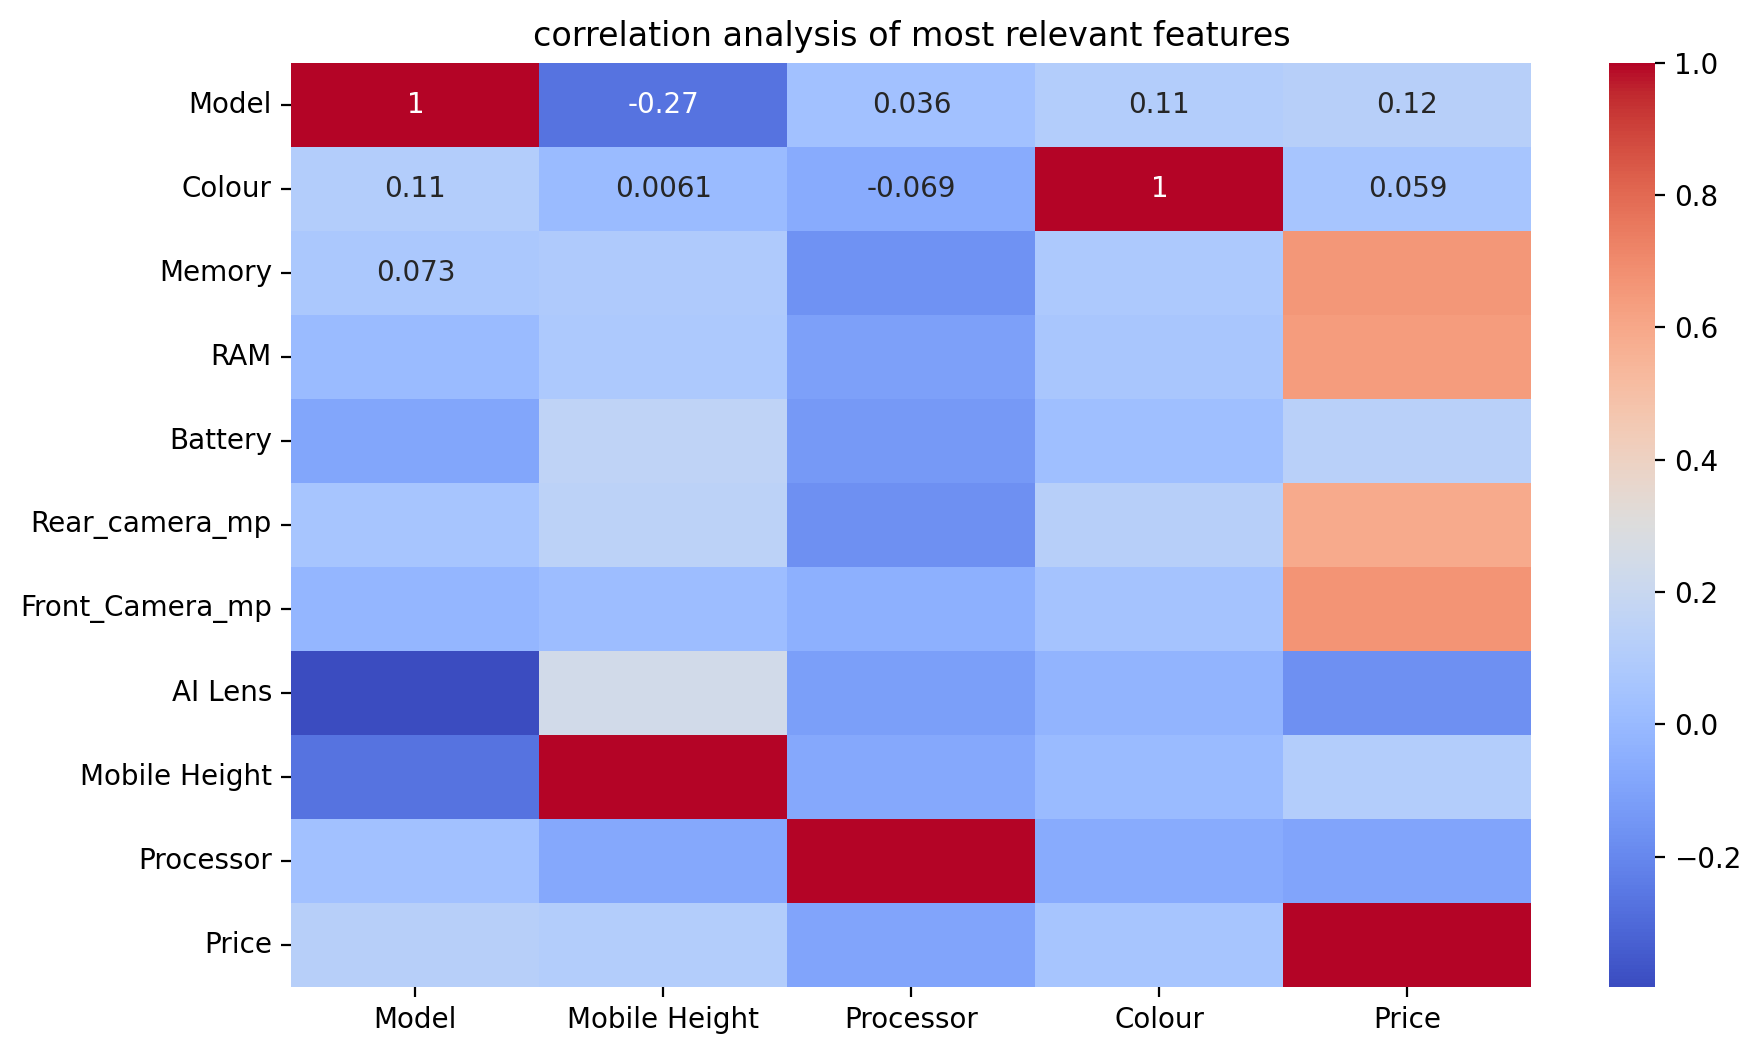

In [84]:
plt.figure(figsize = (10,6),dpi = 200)
sns.heatmap(df.corr()[['Model','Mobile Height','Processor','Colour','Price']],annot = True,cmap = 'coolwarm')
plt.title('correlation analysis of most relevant features')

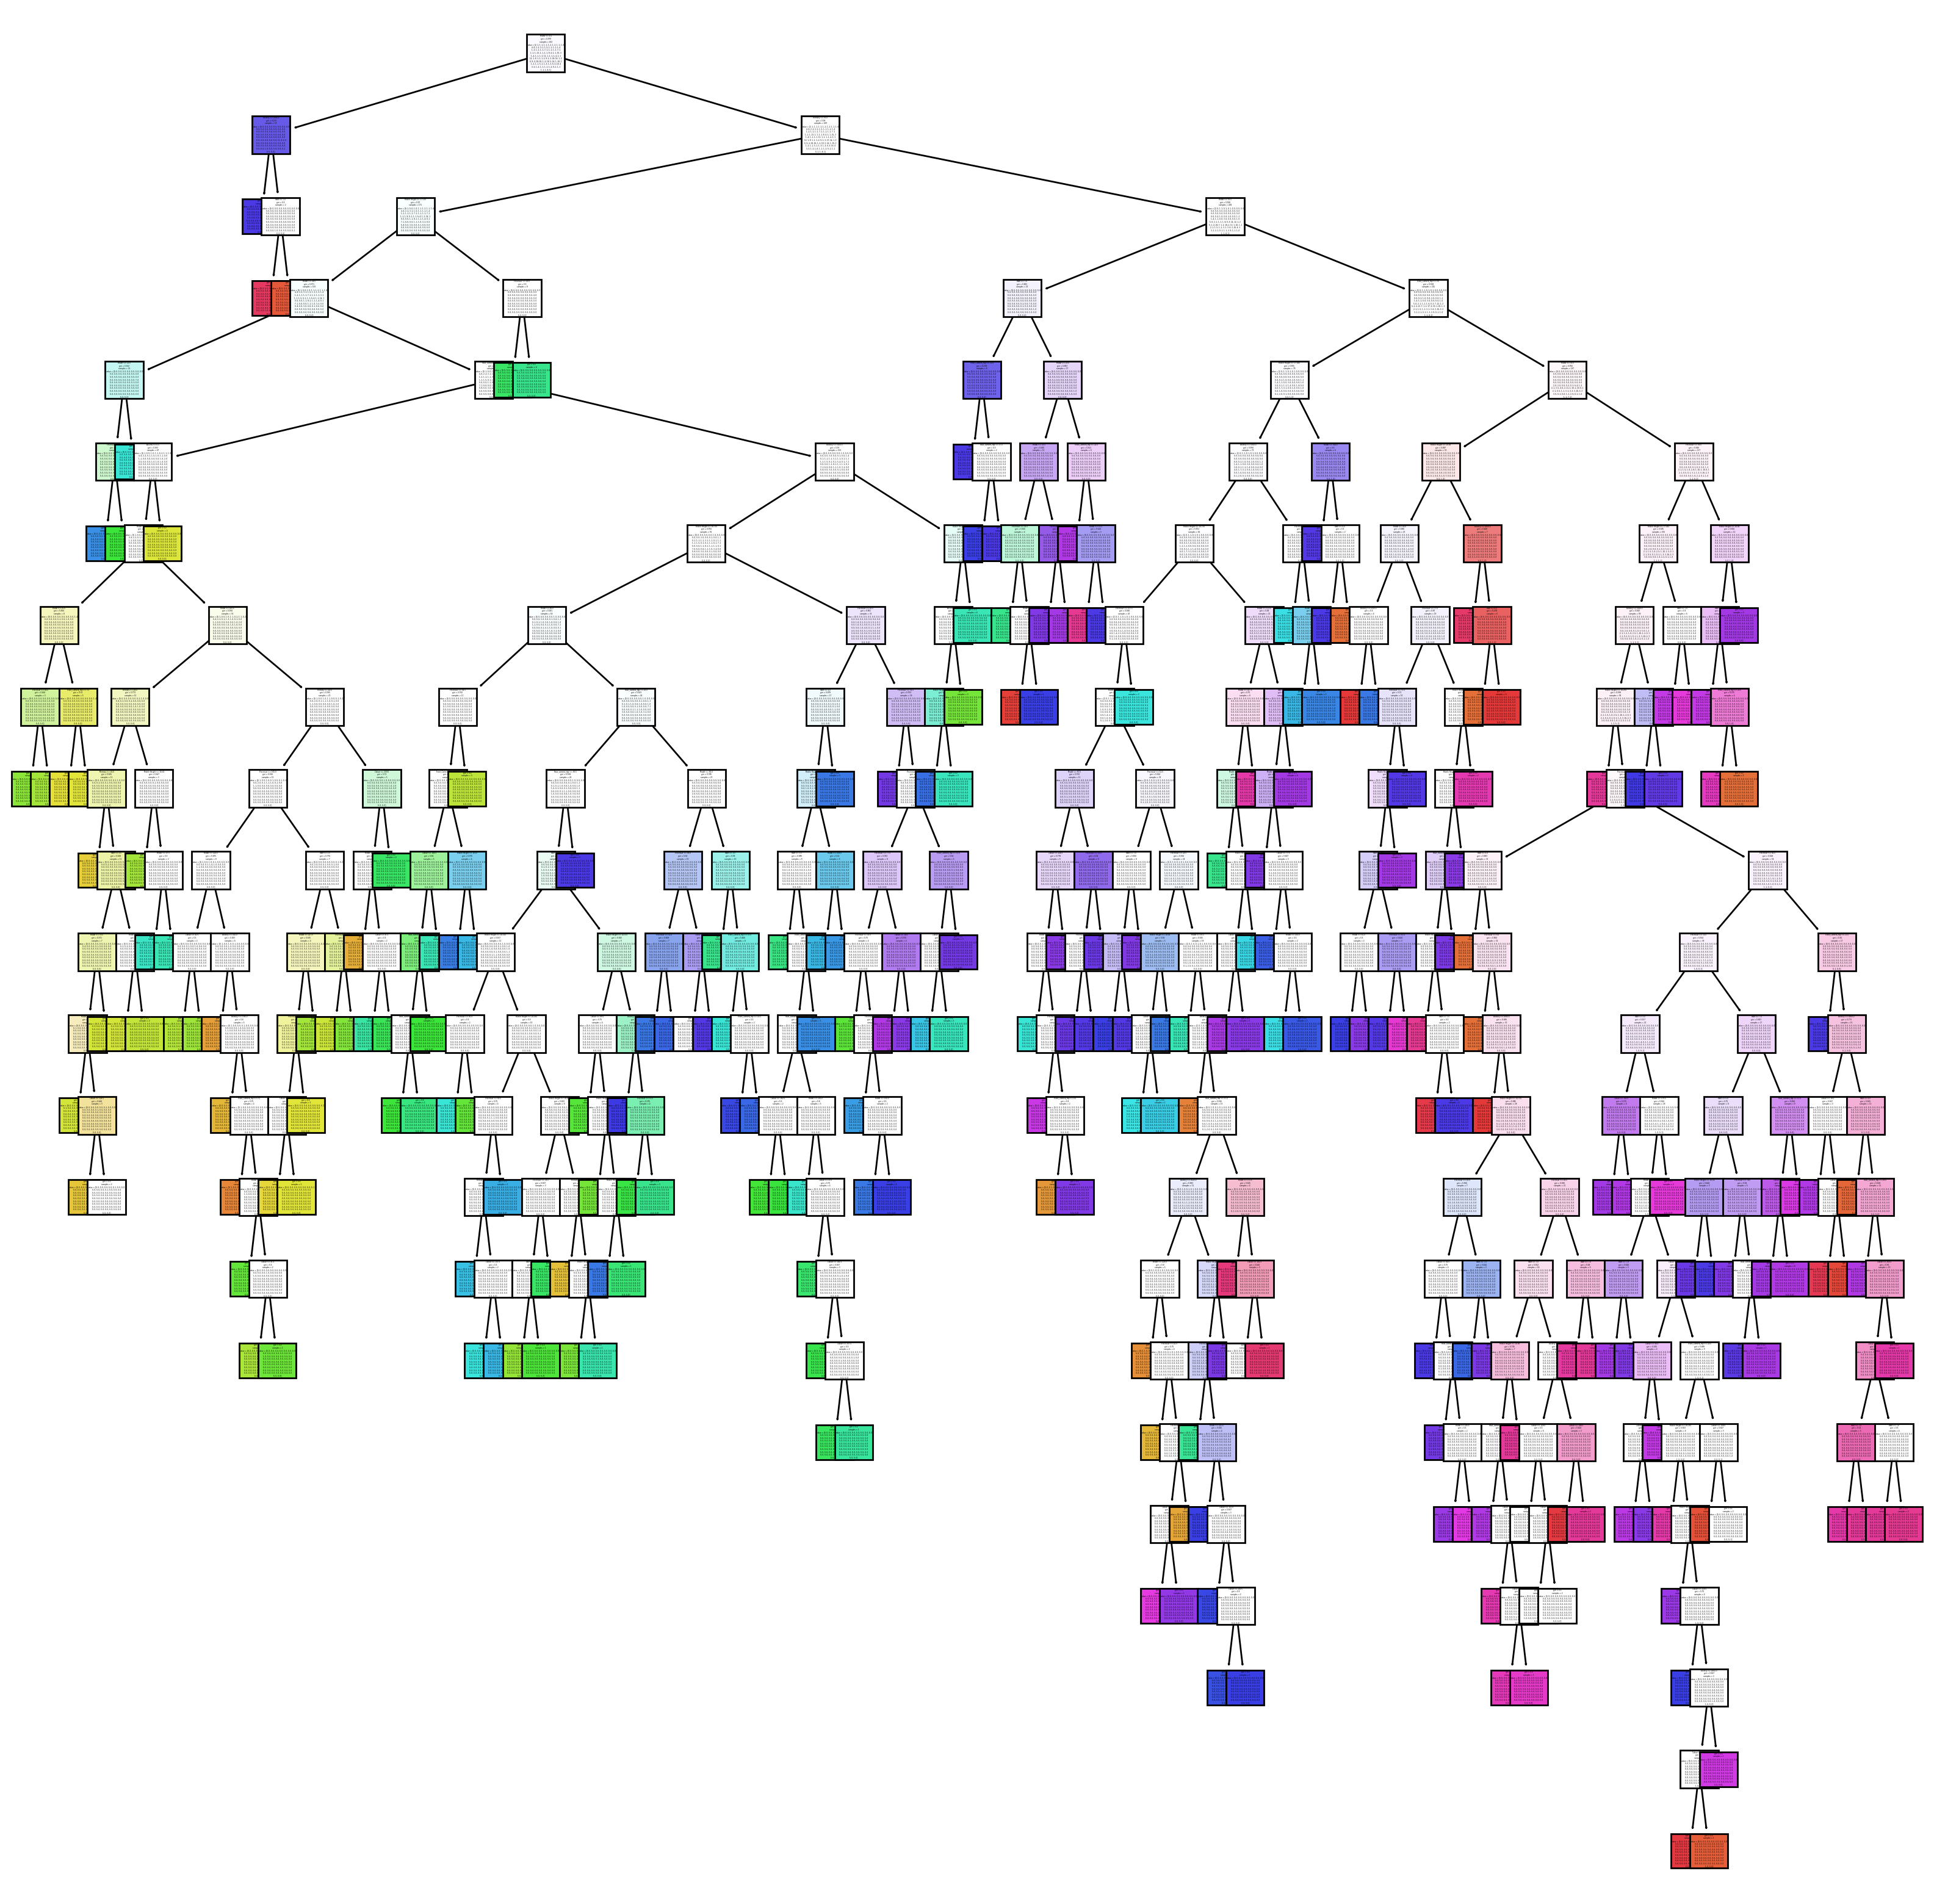

In [85]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,20),dpi = 200)
plot_tree(dtmodel,feature_names = X.columns,filled = True);

In [86]:
def report_model(dtmodel):
    based_pred = dtmodel.predict(X_test)
    print(classification_report(y_test,base_pred))
    print('\n')


In [87]:
report_model(dtmodel)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1699.0       0.00      0.00      0.00         1
      2490.0       0.00      0.00      0.00         0
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5999.0       1.00      0.50      0.67         2
      6499.0       0.33      1.00      0.50         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7280.0       0.00      0.00      0.00         0
      7299.0       1.00    

**Here the accuracy is 0.62**

In [88]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [89]:
report_model(pruned_tree)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1699.0       0.00      0.00      0.00         1
      2490.0       0.00      0.00      0.00         0
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5999.0       1.00      0.50      0.67         2
      6499.0       0.33      1.00      0.50         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7280.0       0.00      0.00      0.00         0
      7299.0       1.00    

**Here accuracy is 0.55**

In [90]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes = 3)
max_leaf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [91]:
report_model(max_leaf_tree)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1699.0       0.00      0.00      0.00         1
      2490.0       0.00      0.00      0.00         0
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5999.0       1.00      0.50      0.67         2
      6499.0       0.33      1.00      0.50         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7280.0       0.00      0.00      0.00         0
      7299.0       1.00    

**Here accuracy is 0.62**

In [111]:
entropy_tree = DecisionTreeClassifier(criterion = 'entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [112]:
report_model(entropy_tree)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1699.0       0.00      0.00      0.00         1
      2490.0       0.00      0.00      0.00         0
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5999.0       1.00      0.50      0.67         2
      6499.0       0.33      1.00      0.50         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7280.0       0.00      0.00      0.00         0
      7299.0       1.00    

**Here accuracy is 0.62**

In [113]:
 from sklearn.ensemble import RandomForestRegressor

In [114]:
df_clean.tail()

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor,Price
536,118.0,49.0,128.0,8,3900,50.0,12.0,0,16.71,89.0,13499.0
537,32.0,52.0,32.0,2,3100,5.0,2.0,0,16.71,68.0,5998.0
538,123.0,259.0,64.0,4,5000,50.0,8.0,0,16.76,35.0,9990.0
539,110.0,17.0,128.0,8,5000,50.0,32.0,0,16.26,11.0,13499.0
540,59.0,215.0,128.0,4,5000,50.0,8.0,0,16.66,57.0,15999.0


In [115]:
model = RandomForestRegressor()

In [116]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [117]:
predictions = model.predict(X_train)
print('the model score is:', model.score(X_train,y_train))

the model score is: 0.9697316809427593


**we found that model score for random forest is higher then any other model**

In [118]:
# Make the prediction:
new_data = X_test
y_pred = model.predict(new_data)


In [119]:


Predicted_price = y_pred
actual_price= y_test
test_residuals = y_test - y_pred
comparison = create_dataframe(Predicted_price, actual_price,test_residuals,'Predicted price','Actual price','Error')
print(comparison)

     Predicted price  Actual price        Error
499     16699.000000       16999.0   300.000000
486     18354.000000       17499.0  -855.000000
65      15072.740000       14490.0  -582.740000
41      10975.790000       10999.0    23.210000
326     27694.340000       32999.0  5304.660000
403     31943.550000       30999.0  -944.550000
514     12591.091500       11999.0  -592.091500
250      2220.160000        1199.0 -1021.160000
47      11276.450000        9999.0 -1277.450000
172      6104.370000        5999.0  -105.370000
383      8843.350000        9499.0   655.650000
261     24469.440000       21999.0 -2470.440000
528     17889.000000       17499.0  -390.000000
260     24145.130000       21999.0 -2146.130000
465     16098.260000       13499.0 -2599.260000
119     12032.730000       11999.0   -33.730000
244      2527.690000        3549.0  1021.310000
479      8878.220000        8999.0   120.780000
107     15257.786667       15999.0   741.213333
247      1988.230000         920.0 -1068

In [120]:
mean_absolute_error(y_test,y_pred)


967.8945198776757

In [121]:
mean_squared_error(y_test,y_pred)


2168388.627936164

In [122]:
metrics.explained_variance_score(y_test,y_pred)

0.9631411437745043

**Here we can see that predicted price is more closer to the actual price in random forest regressor so this model is best as compare to the other model so we must select this model for prediction** 

**Evaluating model performance using R2_score**

In [123]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [124]:
#Predicting the test result

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)


Evalueating the model performance

In [125]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9624911578038229

In [126]:
Predicted_price = y_pred
actual_price= y_test
test_residuals = y_test - y_pred
comparison = create_dataframe(Predicted_price, actual_price,test_residuals,'Predicted price','Actual price','Error')
print(comparison)


     Predicted price  Actual price   Error
499          17349.0       16999.0  -350.0
486          18349.0       17499.0  -850.0
65           14191.8       14490.0   298.2
41           10808.8       10999.0   190.2
326          28249.0       32999.0  4750.0
403          29698.1       30999.0  1300.9
514          12588.6       11999.0  -589.6
250           1679.1        1199.0  -480.1
47           10719.0        9999.0  -720.0
172           6198.9        5999.0  -199.9
383           8632.2        9499.0   866.8
261          22288.1       21999.0  -289.1
528          17149.0       17499.0   350.0
260          22188.1       21999.0  -189.1
465          15849.0       13499.0 -2350.0
119          11977.2       11999.0    21.8
244           2406.3        3549.0  1142.7
479           8548.1        8999.0   450.9
107          16049.0       15999.0   -50.0
247           1748.1         920.0  -828.1
133           1968.6        2615.0   646.4
438          19199.0       20999.0  1800.0
355        

In [127]:
mean_absolute_error(y_test,y_pred)

959.7816513761469

In [128]:
mean_squared_error(y_test,y_pred)


2166955.1565137617

In [129]:
metrics.explained_variance_score(y_test,y_pred)

0.9625355405813445

**Here also we can see that predicted price is very much closer to the actual price**